In [1]:
import pandas as pd
import numpy as np

import os.path

training_data = pd.read_parquet(os.path.join("data", "training.parquet"))

In [2]:
training_data.sample(10)

,Message,Subject,Catagory
4852,Joe Torre has to be the worst manager in baseb...,Torre: The worst manager?,rec.sport.baseball
18538,\n********************* NEW PRICE ***********\...,Lotus 1-2-3 ver 3.4 forsale,misc.forsale
8319,mryan@stsci.edu writes:\n: Am I justified in b...,Re: Should I be angry at this doctor?,sci.med
11214,In article <1993May12.161857.29950@samba.oit.u...,Re: TWM,comp.windows.x
4623,In article <1993Apr12.130652.22090@sei.cmu.edu...,Re: Spanky Released,rec.sport.baseball
8230,eulenbrg@carson.u.washington.edu (Julia Eulenb...,Re: RA treatment question,sci.med
13731,\nHi Netters!\n\nI'm looking at purchasing som...,Help me select a Backup Solution,comp.sys.ibm.pc.hardware
17091,cobb@alexia.lis.uiuc.edu (Mike Cobb) writes:\n...,Re: Ancient Books,soc.religion.christian
6575,\n\nCould someone post the Flyers record with ...,Re: FLYERS notes 4/17,rec.sport.hockey
7446,In article <1993Apr22.065357.9667@cs.aukuni.ac...,"Re: Once tapped, your code is no good any more.",sci.crypt


In [3]:
import cloudpickle as cp
feature_pipeline = cp.load(open('feature_pipeline.sav', 'rb'))

In [4]:
training_vecs = feature_pipeline.fit_transform(training_data["Subject"]+["Message"])

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [6]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=404)

In [7]:
rfc.fit(training_vecs, training_data["Catagory"])

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=404)

In [8]:
rfc.score(training_vecs, training_data.Catagory)

0.3934179393417939

In [9]:
testing_data = pd.read_parquet(os.path.join("data", "testing.parquet"))
testing_vecs=feature_pipeline.transform(testing_data["Message"]+testing_data["Subject"])
rfc.score(testing_vecs, testing_data.Catagory)

0.19257152417600804

In [10]:
print(rfc.predict(testing_vecs))
print(testing_data["Catagory"])

['sci.electronics' 'talk.politics.mideast' 'sci.electronics' ...
 'sci.electronics' 'sci.electronics' 'comp.sys.mac.hardware']
4        talk.politics.mideast
13       talk.politics.mideast
16       talk.politics.mideast
17       talk.politics.mideast
19       talk.politics.mideast
                 ...          
19915       talk.religion.misc
19916       talk.religion.misc
19917       talk.religion.misc
19919       talk.religion.misc
19921       talk.religion.misc
Name: Catagory, Length: 5977, dtype: object


In [20]:
from mlworkflows import plot

df, chart =plot.confusion_matrix(testing_data.Catagory, rfc.predict(testing_vecs))

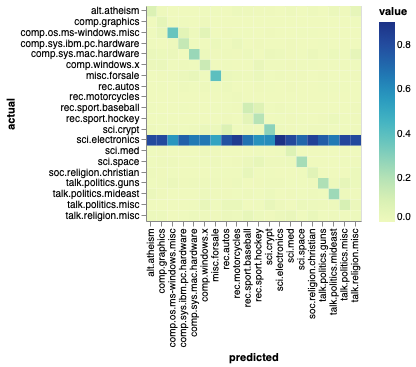

In [21]:
chart

In [13]:
from sklearn.metrics import classification_report
print(classification_report(testing_data.Catagory, rfc.predict(testing_vecs)))

                          precision    recall  f1-score   support

             alt.atheism       0.37      0.09      0.14       284
           comp.graphics       0.78      0.05      0.09       303
 comp.os.ms-windows.misc       0.67      0.37      0.47       293
comp.sys.ibm.pc.hardware       0.68      0.16      0.25       303
   comp.sys.mac.hardware       0.52      0.26      0.34       286
          comp.windows.x       0.52      0.14      0.22       280
            misc.forsale       0.68      0.39      0.50       305
               rec.autos       0.19      0.01      0.02       300
         rec.motorcycles       0.75      0.01      0.02       317
      rec.sport.baseball       0.49      0.12      0.20       291
        rec.sport.hockey       0.65      0.19      0.30       310
               sci.crypt       0.56      0.29      0.38       303
         sci.electronics       0.06      0.90      0.11       274
                 sci.med       0.74      0.08      0.15       314
         

In [14]:
sum(training_data["Catagory"]=="sci.electronics")

720

In [15]:
for i in training_data["Catagory"].unique():
    print(i)
    print(sum(training_data["Catagory"]==i))

misc.forsale
691
rec.sport.hockey
684
sci.space
700
comp.sys.mac.hardware
699
talk.politics.guns
697
comp.os.ms-windows.misc
707
sci.crypt
696
talk.religion.misc
700
comp.sys.ibm.pc.hardware
692
talk.politics.mideast
699
alt.atheism
709
rec.motorcycles
683
sci.med
683
comp.graphics
692
sci.electronics
720
soc.religion.christian
687
rec.sport.baseball
702
comp.windows.x
716
talk.politics.misc
694
rec.autos
696


In [22]:
for i in training_data["Catagory"].unique():
    print(i)
    print(sum(rfc.predict(testing_vecs)==i))

misc.forsale
174
rec.sport.hockey
92
sci.space
110
comp.sys.mac.hardware
143
talk.politics.guns
122
comp.os.ms-windows.misc
160
sci.crypt
155
talk.religion.misc
77
comp.sys.ibm.pc.hardware
69
talk.politics.mideast
111
alt.atheism
67
rec.motorcycles
4
sci.med
35
comp.graphics
18
sci.electronics
4334
soc.religion.christian
46
rec.sport.baseball
73
comp.windows.x
75
talk.politics.misc
91
rec.autos
21
